### Self Organizing Maps - SOM

In [1]:
# Importing the necessary libraries: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Extracting the dataset: 
df = pd.read_csv('Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


### EDA:

In [5]:
# Determining the shape of the dataset: 
df.shape

(690, 16)

In [6]:
# Checking for any nan or empty values: 
df.isna().sum()

CustomerID    0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
Class         0
dtype: int64

#### Data Preprocessing: 

In [8]:
# Defining x and y: 
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [9]:
# Feature scaling the dataset: 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x = sc.fit_transform(x)

#### Building and training the model: 

In [3]:
# Developing the SOM using minisom.py file: 

In [11]:
x.shape

(690, 15)

In [53]:
# importing the minisom library: 
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len=15)
som.random_weights_init(x)
som.train_random(x, num_iteration=100)

#### Visualizing the results: 

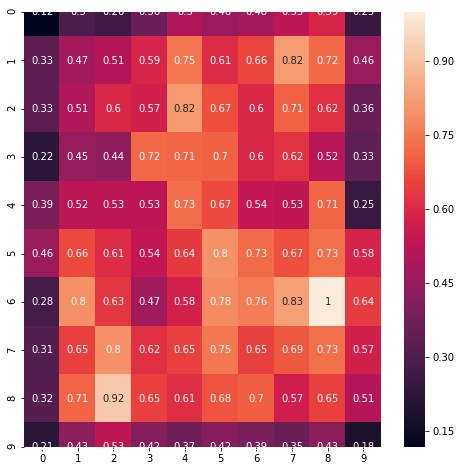

In [54]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(8,8))
sns.heatmap(som.distance_map().T, annot = True)
plt.show()

#### Finding the anomalies:


In [58]:
mappings = som.win_map(x)
anomalies = np.concatenate((mappings[(8,6)], mappings[(2,8)]), axis = 0)

In [59]:
# Result: 
anomalies = pd.DataFrame(sc.inverse_transform(anomalies))

In [60]:
anomalies

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15813718.0,1.0,42.83,1.250,2.0,7.0,4.0,13.875,0.0,1.0,1.0,1.0,2.0,352.0,113.0
1,15815271.0,1.0,27.58,3.250,1.0,11.0,8.0,5.085,0.0,1.0,2.0,1.0,2.0,369.0,2.0
2,15805627.0,1.0,27.83,1.500,2.0,9.0,4.0,2.250,0.0,1.0,1.0,1.0,2.0,100.0,4.0
3,15789865.0,1.0,18.17,2.460,2.0,8.0,7.0,0.960,0.0,1.0,2.0,1.0,2.0,160.0,588.0
4,15790113.0,1.0,17.50,22.000,3.0,1.0,7.0,0.000,0.0,0.0,0.0,1.0,3.0,450.0,100001.0
5,15766183.0,0.0,24.50,0.500,2.0,11.0,8.0,1.500,1.0,0.0,0.0,0.0,2.0,280.0,825.0
6,15684722.0,0.0,27.67,1.500,2.0,7.0,4.0,2.000,1.0,0.0,0.0,0.0,1.0,368.0,1.0
7,15772329.0,0.0,28.08,15.000,1.0,10.0,9.0,0.000,1.0,0.0,0.0,0.0,2.0,0.0,13213.0
8,15734649.0,0.0,40.83,10.000,2.0,11.0,8.0,1.750,1.0,0.0,0.0,0.0,2.0,29.0,838.0
9,15646082.0,0.0,18.83,4.415,1.0,8.0,8.0,3.000,1.0,0.0,0.0,0.0,2.0,240.0,1.0
